In [2]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakePerth

backend = AerSimulator.from_backend(FakePerth())

import qiskit
from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.library import StateTomography

from qiskit.visualization import plot_state_city

In [3]:

# GHZ State preparation circuit
nq = 2
qc_ghz = qiskit.QuantumCircuit(nq)
qc_ghz.h(0)
qc_ghz.s(0)
for i in range(1, nq):
    qc_ghz.cx(0, i)

# QST Experiment
qstexp1 = StateTomography(qc_ghz)
qstdata1 = qstexp1.run(backend, seed_simulation=100).block_for_results()

# Print results
for result in qstdata1.analysis_results():
    print(result)

AnalysisResult
- name: state
- value: DensityMatrix([[ 0.47908727+0.00000000e+00j, -0.00948308-5.51182183e-04j,
                 0.02051725-3.89768929e-03j, -0.00193057-4.55144891e-01j],
               [-0.00948308+5.51182183e-04j,  0.02574485+8.67361738e-19j,
                 0.01091314-3.92611780e-03j, -0.0155163 -1.38192577e-03j],
               [ 0.02051725+3.89768929e-03j,  0.01091314+3.92611780e-03j,
                 0.01871224+8.67361738e-19j,  0.00356125-8.42471583e-03j],
               [-0.00193057+4.55144891e-01j, -0.0155163 +1.38192577e-03j,
                 0.00356125+8.42471583e-03j,  0.47645565+0.00000000e+00j]],
              dims=(2, 2))
- extra: <7 items>
- device_components: ['Q0', 'Q1']
- verified: False
AnalysisResult
- name: state_fidelity
- value: 0.9329163468886417
- device_components: ['Q0', 'Q1']
- verified: False
AnalysisResult
- name: positive
- value: True
- device_components: ['Q0', 'Q1']
- verified: False


In [4]:
state_result = qstdata1.analysis_results("state")
print(state_result.value)

DensityMatrix([[ 0.47908727+0.00000000e+00j, -0.00948308-5.51182183e-04j,
                 0.02051725-3.89768929e-03j, -0.00193057-4.55144891e-01j],
               [-0.00948308+5.51182183e-04j,  0.02574485+8.67361738e-19j,
                 0.01091314-3.92611780e-03j, -0.0155163 -1.38192577e-03j],
               [ 0.02051725+3.89768929e-03j,  0.01091314+3.92611780e-03j,
                 0.01871224+8.67361738e-19j,  0.00356125-8.42471583e-03j],
               [-0.00193057+4.55144891e-01j, -0.0155163 +1.38192577e-03j,
                 0.00356125+8.42471583e-03j,  0.47645565+0.00000000e+00j]],
              dims=(2, 2))


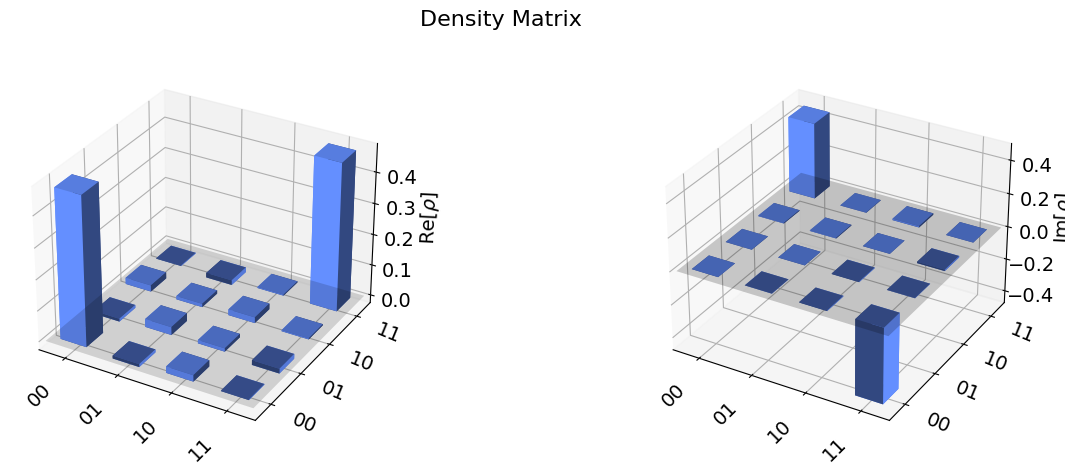

In [5]:
plot_state_city(qstdata1.analysis_results("state").value, title='Density Matrix')

In [6]:
fid_result = qstdata1.analysis_results("state_fidelity")
print("State Fidelity = {:.5f}".format(fid_result.value))

State Fidelity = 0.93292
